In [1]:
import tensorflow as tf
import tensorflow.contrib.layers as layers
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Data
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

In [3]:
#Understanding Data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


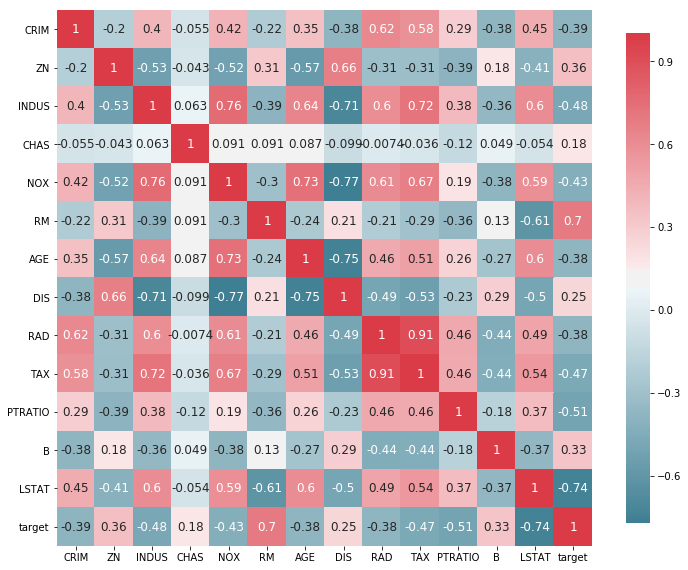

In [4]:
# Plotting correlation color map
_ , ax = plt.subplots( figsize =( 12 , 10 ) )

corr = df.corr(method='pearson')
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
_ = sns.heatmap(
    corr, 
    cmap = cmap,
    square=True, 
    cbar_kws={ 'shrink' : .9 }, 
    ax=ax, 
    annot = True, 
    annot_kws = { 'fontsize' : 12 })

In [5]:
# Create Test Train Split
X_train, X_test, y_train, y_test = train_test_split(df [['RM', 'LSTAT', 'PTRATIO']], df[['target']], test_size=0.3, random_state=0)

# Normalize data
X_train = MinMaxScaler().fit_transform(X_train)
y_train = MinMaxScaler().fit_transform(y_train)

X_test =  MinMaxScaler().fit_transform(X_test)
Y_test =  MinMaxScaler().fit_transform(y_test)

In [6]:
#Network Parameters
m = len(X_train)
n = 3   # Number of features
n_hidden = 20  # Number of hidden neurons


# Hyperparameters
batch_size = 200
eta = 0.01
max_epoch = 1000

In [7]:
def multilayer_perceptron(x):
    fc1 = layers.fully_connected(x, n_hidden, activation_fn=tf.nn.relu, scope='fc1')
    out = layers.fully_connected(fc1, 1, activation_fn=tf.sigmoid, scope='out')
    return out

In [8]:
def accuracy(a,b):
    correct_prediction = tf.square(a -b)
    return tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [9]:
# build model, loss, and train op
x = tf.placeholder(tf.float32, name='X', shape=[m,n])
y = tf.placeholder(tf.float32, name='Y')
y_hat = multilayer_perceptron(x)


mse =  accuracy(y, y_hat) 
train = tf.train.AdamOptimizer(learning_rate= eta).minimize(mse)

init = tf.global_variables_initializer()

Epoch 0: Loss 0.04802137240767479
Epoch 100: Loss 0.009358183480799198
Epoch 200: Loss 0.008515273220837116
Epoch 300: Loss 0.008019003085792065
Epoch 400: Loss 0.007625401485711336
Epoch 500: Loss 0.007439814042299986
Epoch 600: Loss 0.007374355103820562
Epoch 700: Loss 0.007337563205510378
Epoch 800: Loss 0.007272187154740095
Epoch 900: Loss 0.007163187023252249
Training Done
Optimization Finished!
 Mean Squared Error (Train data): 0.00701855


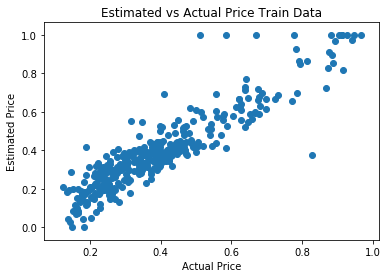

In [11]:
# Computation Graph
with tf.Session() as sess:
    # Initialize variables
    sess.run(init)
    writer = tf.summary.FileWriter('graphs', sess.graph)

    # train the model for 100 epcohs
    for i in range(max_epoch):
       _, l, p = sess.run([train, mse, y_hat], feed_dict={x: X_train, y: y_train})
       if i%100 == 0:
            print('Epoch {0}: Loss {1}'.format(i, l))

    print("Training Done")
    print("Optimization Finished!")

    
    # Calculate accuracy
    print(" Mean Squared Error (Train data):", mse.eval({x: X_train, y: y_train}))
    
    plt.scatter(p,y_train)
    plt.ylabel('Estimated Price')
    plt.xlabel('Actual Price')
    plt.title('Estimated vs Actual Price Train Data')
    
    
       
    writer.close()